## Dataset: Image ClassificationI using SVM
## Aim: Using SVM deploy Image Classification

In [2]:
# Import all the Library
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [3]:
Categories=['Cars','Ice cream cone','Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
    check=input()
    if(check=='n' or check=='y'):
        break
    print("Please give a valid input (y/n)")
    
if(check=='y'):
    print("Enter How Many types of Images do you want to classify")
    n=int(input())
    Categories=[]
    print(f'please enter {n} names')
    for i in range(n):
        name=input()
        Categories.append(name)
    print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
n


In [5]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir="D:\Advance_Machine_Learning\Advanced_ML_Datasets\Image-Classification-main"
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.718931,0.718931,0.718931,0.723172,0.723172,0.723172,0.726831,0.726831,0.726831,0.729648,...,0.343630,0.324487,0.312722,0.340675,0.321446,0.309681,0.338502,0.319273,0.307508,0
2,0.187870,0.175087,0.166392,0.267480,0.241407,0.178614,0.291785,0.246191,0.177539,0.292813,...,0.596285,0.600187,0.608044,0.605469,0.609391,0.620086,0.587750,0.591672,0.610687,0
3,0.763509,0.694619,0.616188,0.758216,0.691426,0.612994,0.759536,0.692393,0.613961,0.752903,...,0.430641,0.465518,0.454430,0.432574,0.468497,0.464130,0.432538,0.471443,0.474683,0
4,0.264764,0.269562,0.281013,0.283545,0.274633,0.279183,0.117344,0.106521,0.102887,0.067332,...,0.540330,0.515482,0.508428,0.555654,0.537145,0.526144,0.537862,0.519078,0.511778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
96,0.576470,0.658928,0.348809,0.576471,0.658929,0.348809,0.576903,0.659782,0.348400,0.579959,...,0.537051,0.589850,0.288314,0.568179,0.607257,0.313567,0.581216,0.607849,0.318061,2
97,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [7]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [8]:
# Prediction
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1])

In [9]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [10]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 90.0% accurate


In [11]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagehttps://media.istockphoto.com/id/471317762/photo/vanilla-ice-cream-cone.jpg?s=612x612&w=0&k=20&c=flLbm_rGYxD66_1O6UHizwLtnes0-gExeeIw-uprMcQ=


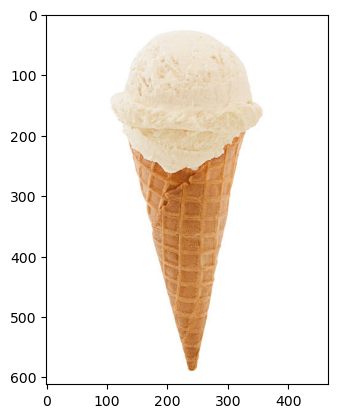

Cars = 1.7116848208275095%
Ice cream cone = 95.43288230523459%
Cricket ball = 2.8554328739379136%
The predicted image is : Ice cream cone
Is the image a Ice cream cone ?(y/n)
y
Thank you for your feedback


In [16]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
    b=input()
    if(b=="y" or b=="n"):
        break
    print("please enter either y or n")

if(b=='n'):
    print("What is the image?")
    for i in range(len(Categories)):
        print(f"Enter {i} for {Categories[i]}")
    
    k=int(input())
    while(k<0 or k>=len(Categories)):
        
        print(f"Please enter a valid number between 0-{len(Categories)-1}")
        k=int(input())
        
    print("Please wait for a while for the model to learn from this image :)")
    flat_arr=flat_data_arr.copy()
    tar_arr=target_arr.copy()
    tar_arr.append(k)
    flat_arr.extend(l)
    tar_arr=np.array(tar_arr)
    flat_df=np.array(flat_arr)
    df1=pd.DataFrame(flat_df)
    df1['Target']=tar_arr
    model1=GridSearchCV(svc,param_grid)
    x1=df1.iloc[:,:-1]
    y1=df1.iloc[:,-1]
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
    d={}
    for i in model.best_params_:
        d[i]=[model.best_params_[i]]
    model1=GridSearchCV(svc,d)
    model1.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
    pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")